In [ ]:
%pip install -U datasets
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
#df= pd.read_csv('https://lukedb.co/python_csv')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
country7='United States'
job7='Data Analyst'
df_q=df[(df['job_title_short']==job7)&(df['job_country']==country7)].copy()
df_q=df_q.dropna(subset='salary_year_avg')
df_q_explode=df_q.explode('job_skills')
df_q_explode=df_q_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_q4=df_q_explode.rename(columns={'count':'skill_count', 'median':'median_salary'})
df_job_count=len(df_q)
df_q4['skill_percent']=df_q4['skill_count']/df_job_count * 100
skill_percent = 5
df_skills_high_demand=df_q4[df_q4['skill_percent']>skill_percent]

,technology,skills
0,analyst_tools,word
0,analyst_tools,spss
0,analyst_tools,microstrategy
0,analyst_tools,ssis
0,analyst_tools,sap
...,...,...
9,sync,google chat
9,sync,rocketchat
9,sync,zoom
9,sync,wire


In [ ]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

df_technology=pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])
df_technology=df_technology.explode('skills')
df_technology

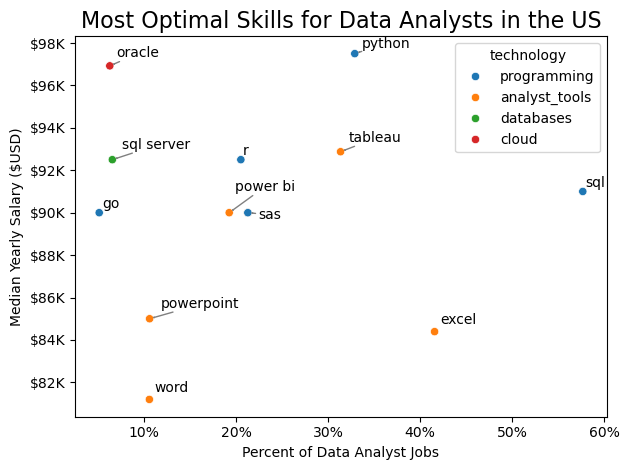

In [ ]:
df_br=df_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')
df_br

from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter
sns.scatterplot(data=df_br, x='skill_percent', y='median_salary', hue='technology')
texts=[]
for i, txt in enumerate(df_skills_high_demand.index):
    
    texts.append(plt.text(df_skills_high_demand['skill_percent'].iloc[i], df_skills_high_demand['median_salary'].iloc[i], txt))
adjust_text(texts,  expand=(1.2, 2), arrowprops=dict(arrowstyle='->', color='grey'))


plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts in the US', fontsize=16)
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K' ))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()
